In [12]:
import requests
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [13]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
r = requests.get(url)

In [14]:
with open('covid_data.csv', 'wb') as f:
    f.write(r.content)

In [15]:
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

200
text/plain; charset=utf-8
utf-8


In [16]:
covid_pd = pd.read_csv('covid_data.csv')

In [17]:
covid_pd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [18]:
alberta_pd = covid_pd[covid_pd['Province/State']=='Alberta']

In [19]:
alberta_pd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,542,542,621,661,690,754,969,969,1075,1181


In [20]:
data_df = pd.Series(alberta_pd.columns[ 4:],name='datetime').to_frame()
data_df['datetime'] = pd.to_datetime(data_df['datetime'], format='%m/%d/%y')
data_df['cases'] = pd.Series(alberta_pd.loc[35,:])[4:].reset_index(drop=True).astype(int)

In [21]:
data_df.info()
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  75 non-null     datetime64[ns]
 1   cases     75 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


,datetime,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


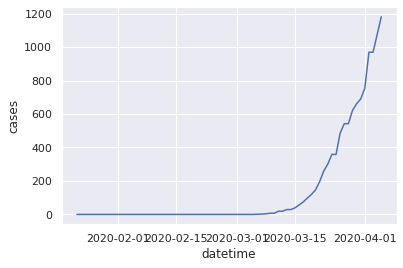

In [22]:
ax = sns.lineplot(x='datetime',y='cases',data=data_df)